In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc
from sklearn.model_selection import KFold

import statsmodels.formula.api as smf
import statsmodels.api as sm


from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier,BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import itertools as it
from pyearth import Earth
import time as time

In [2]:
train = pd.read_csv('train_classification.csv')
test = pd.read_csv('test_regression.csv')

In [3]:
#merging full dataset for visualization and cleaning
data = pd.concat([train, test], axis = 0)

# Data viz + Cleaning

In [4]:
data.columns

Index(['id', 'hi_int_prncp_pd', 'acc_now_delinq', 'acc_open_past_24mths',
       'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal',
       'bc_util', 'delinq_2yrs', 'delinq_amnt', 'dti', 'earliest_cr_line',
       'emp_length', 'emp_title', 'grade', 'home_ownership',
       'initial_list_status', 'int_rate', 'last_credit_pull_d', 'loan_amnt',
       'mort_acc', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'out_prncp_inv', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'sub_grade', 'term', 'tot_coll_amt', 'tot_cur_bal',
       'total_rec_late_fee', 'verification_status'],
      dtype='object')

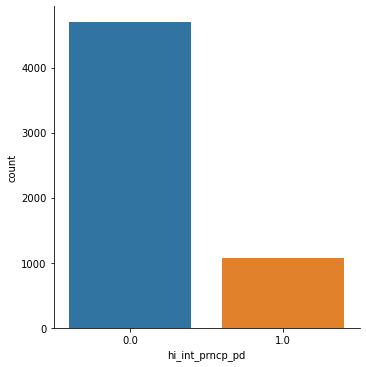

In [5]:
sns.catplot(data=data, x='hi_int_prncp_pd', kind='count')

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='acc_now_delinq'>

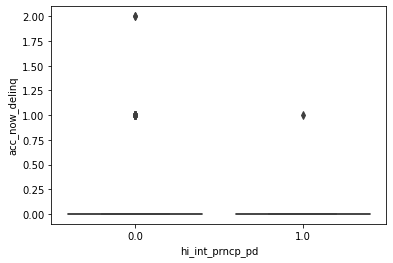

In [6]:
sns.boxplot(data = data,  x = "hi_int_prncp_pd", y = "acc_now_delinq")

In [7]:
data['acc_now_delinq'].replace(2, 1, inplace = True)

In [8]:
data['acc_now_delinq'].value_counts()

0    9551
1      45
Name: acc_now_delinq, dtype: int64

In [9]:
data['acc_open_past_24mths'].value_counts()

3     1450
4     1368
2     1298
5     1084
1      946
6      870
7      656
8      483
0      397
9      324
10     232
11     152
12     111
13      70
14      54
15      24
16      22
18      16
17      13
22       6
19       6
21       3
23       3
28       2
20       2
24       2
26       1
25       1
Name: acc_open_past_24mths, dtype: int64

In [10]:
cutoff = data['acc_open_past_24mths'].value_counts() <= 100


mask_obs = data['acc_open_past_24mths'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 13)

data['acc_open_past_24mths'] = data['acc_open_past_24mths'].replace(mask_dict)

In [11]:
data['acc_open_past_24mths'].value_counts()

3     1450
4     1368
2     1298
5     1084
1      946
6      870
7      656
8      483
0      397
9      324
10     232
13     225
11     152
12     111
Name: acc_open_past_24mths, dtype: int64

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='acc_open_past_24mths'>

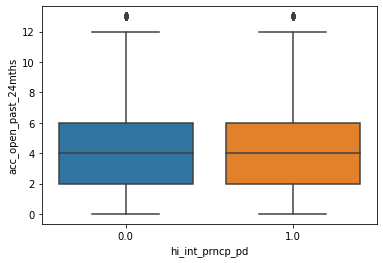

In [12]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "acc_open_past_24mths")

In [13]:
data['addr_state'].value_counts()

CA    1978
NY    1059
TX    1012
FL     834
NJ     400
IL     376
GA     343
PA     325
OH     315
VA     246
MI     224
NC     221
MA     205
MD     187
AZ     184
CO     148
WA     138
MN     126
MO     116
CT     114
IN     112
TN     107
NV      88
AL      81
OR      71
LA      71
SC      68
WI      68
KY      53
OK      50
KS      42
AR      38
MS      28
UT      26
NM      26
NH      22
RI      22
HI      11
DC      10
NE       8
WV       7
ME       6
VT       6
DE       6
WY       5
MT       5
ID       4
ND       2
AK       2
Name: addr_state, dtype: int64

In [14]:
#creating "other" category for states with less than 300 occurrances
cutoff = data['addr_state'].value_counts() <= 300


mask_obs = data['addr_state'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 'other')

data['addr_state'] = data['addr_state'].replace(mask_dict)

In [15]:
data['addr_state'].value_counts()

other    2954
CA       1978
NY       1059
TX       1012
FL        834
NJ        400
IL        376
GA        343
PA        325
OH        315
Name: addr_state, dtype: int64

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='addr_state'>

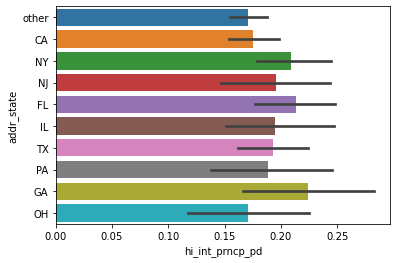

In [16]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "addr_state")

In [17]:
data['annual_inc'].describe()

count    9.596000e+03
mean     8.657562e+04
std      1.061851e+05
min      1.000000e+04
25%      5.200000e+04
50%      7.100000e+04
75%      1.000000e+05
max      6.200000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='hi_int_prncp_pd'>

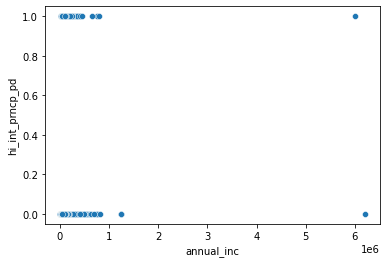

In [18]:
sns.scatterplot(data = data, x = "annual_inc", y = "hi_int_prncp_pd")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='annual_inc'>

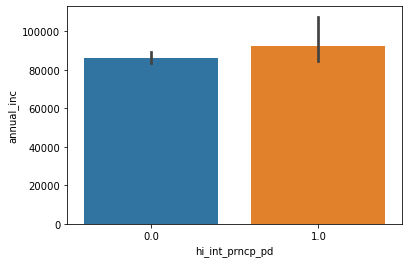

In [19]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "annual_inc")

In [20]:
data['application_type'].value_counts()

Individual    9429
Joint App      167
Name: application_type, dtype: int64

<AxesSubplot:xlabel='avg_cur_bal', ylabel='hi_int_prncp_pd'>

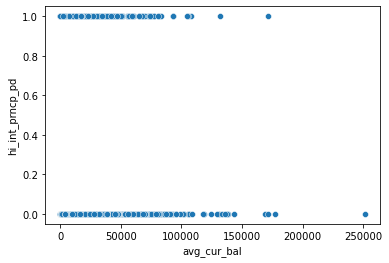

In [21]:
sns.scatterplot(data = data, x = "avg_cur_bal", y = "hi_int_prncp_pd")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='avg_cur_bal'>

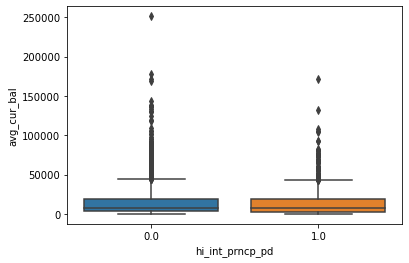

In [22]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "avg_cur_bal")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='avg_cur_bal'>

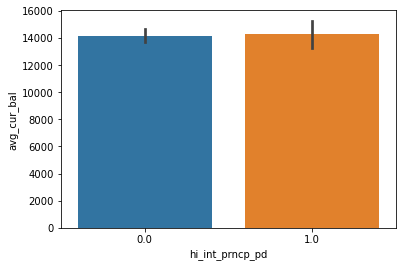

In [23]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "avg_cur_bal")

<AxesSubplot:xlabel='bc_util', ylabel='hi_int_prncp_pd'>

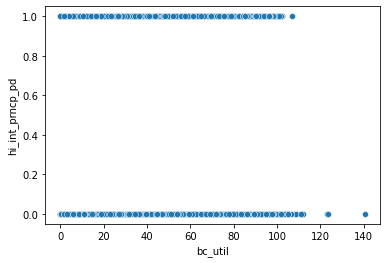

In [24]:
sns.scatterplot(data = data, x = "bc_util", y = "hi_int_prncp_pd")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='bc_util'>

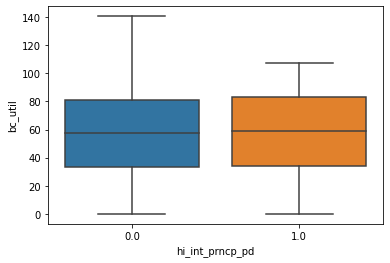

In [25]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "bc_util")

In [26]:
data['delinq_2yrs'].value_counts()

0     7774
1     1207
2      365
3      117
4       47
5       39
6       23
7       10
10       4
9        3
8        2
14       2
18       1
12       1
13       1
Name: delinq_2yrs, dtype: int64

In [27]:
cutoff = data['delinq_2yrs'].value_counts() <= 100


mask_obs = data['delinq_2yrs'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 4)

data['delinq_2yrs'] = data['delinq_2yrs'].replace(mask_dict)

In [28]:
data['delinq_2yrs'].value_counts()

0    7774
1    1207
2     365
4     133
3     117
Name: delinq_2yrs, dtype: int64

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='delinq_2yrs'>

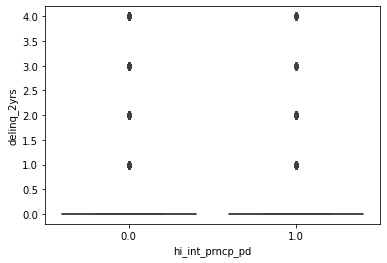

In [29]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "delinq_2yrs")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='delinq_2yrs'>

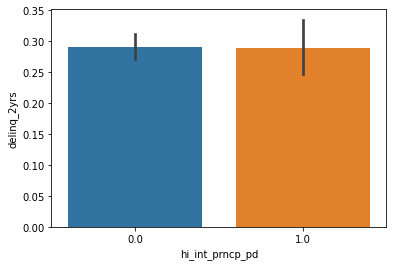

In [30]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "delinq_2yrs")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='delinq_amnt'>

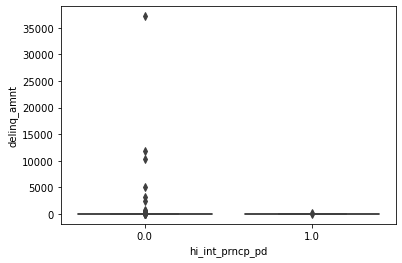

In [31]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "delinq_amnt")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='delinq_amnt'>

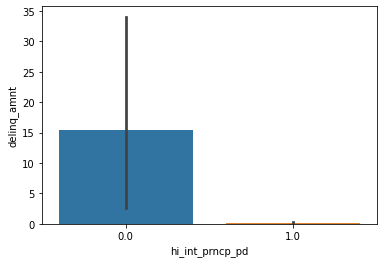

In [32]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "delinq_amnt")

<AxesSubplot:xlabel='dti', ylabel='hi_int_prncp_pd'>

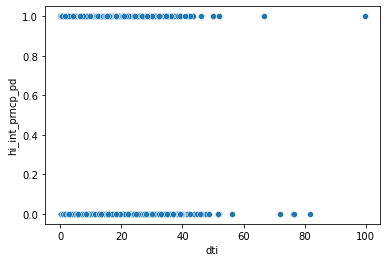

In [33]:
sns.scatterplot(data = data, x = "dti", y = "hi_int_prncp_pd")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='dti'>

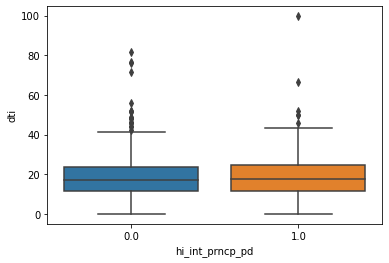

In [34]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "dti")

In [35]:
data['earliest_cr_line'].describe()

count         9596
unique         537
top       Aug-2002
freq            75
Name: earliest_cr_line, dtype: object

In [36]:
data['emp_length'].value_counts()

10+ years    3519
2 years       942
3 years       828
< 1 year      731
5 years       645
1 year        625
4 years       619
6 years       459
7 years       423
8 years       414
9 years       387
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='emp_length'>

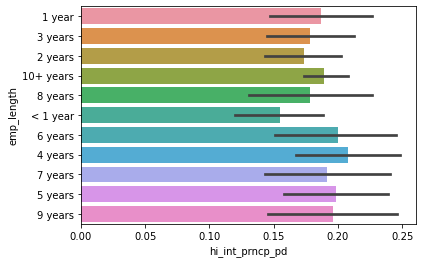

In [37]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "emp_length")

In [38]:
data['emp_title'].value_counts()

Teacher                          708
Manager                          695
Owner                            413
Supervisor                       298
Registered Nurse                 284
                                ... 
Talent Acquisition Specialist      1
Production Control                 1
Risk Manager                       1
Billing                            1
Staff Attorney                     1
Name: emp_title, Length: 964, dtype: int64

In [39]:
#creating "other" category for titles with less than 200 occurrances
cutoff = data['emp_title'].value_counts() < 200


mask_obs = data['emp_title'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 'other')

data['emp_title'] = data['emp_title'].replace(mask_dict)

In [40]:
data['emp_title'].value_counts()

other               6483
Teacher              708
Manager              695
Owner                413
Supervisor           298
Registered Nurse     284
Driver               267
RN                   231
Sales                217
Name: emp_title, dtype: int64

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='emp_title'>

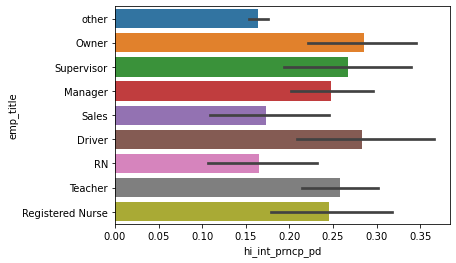

In [41]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "emp_title")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='grade'>

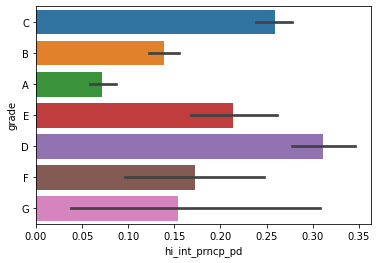

In [42]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "grade")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='home_ownership'>

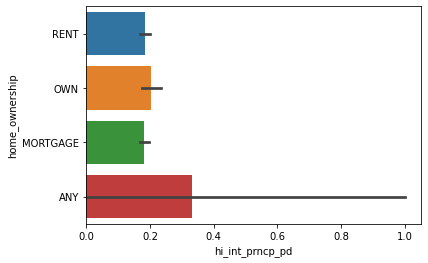

In [43]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "home_ownership")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='initial_list_status'>

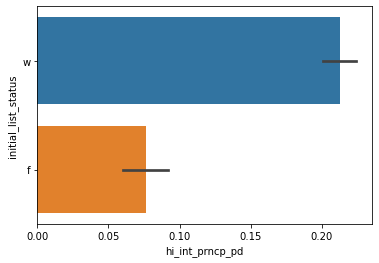

In [44]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "initial_list_status")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='int_rate'>

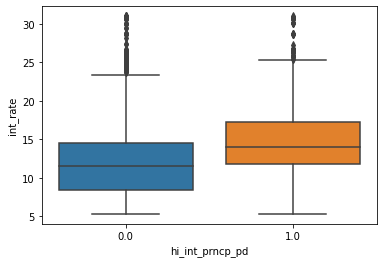

In [45]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "int_rate")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='loan_amnt'>

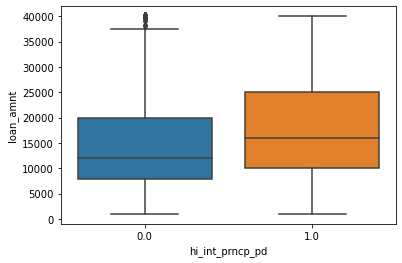

In [46]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "loan_amnt")

In [47]:
data['mort_acc'].value_counts()

0     4101
1     1728
2     1484
3      982
4      611
5      348
6      159
7       83
8       48
9       24
10       9
13       5
11       4
12       3
14       2
19       1
18       1
41       1
17       1
15       1
Name: mort_acc, dtype: int64

In [48]:
cutoff = data['mort_acc'].value_counts() < 10


mask_obs = data['mort_acc'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 10)

data['mort_acc'] = data['mort_acc'].replace(mask_dict)

In [49]:
data['mort_acc'].value_counts()

0     4101
1     1728
2     1484
3      982
4      611
5      348
6      159
7       83
8       48
10      28
9       24
Name: mort_acc, dtype: int64

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='mort_acc'>

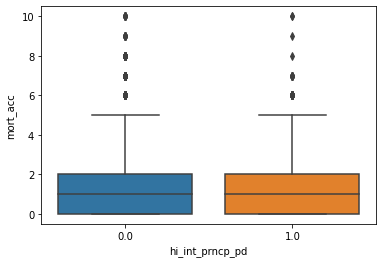

In [50]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "mort_acc")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='num_sats'>

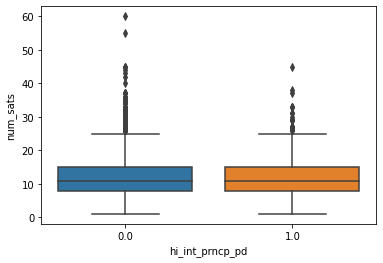

In [51]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "num_sats")

In [52]:
data['num_tl_120dpd_2m'].value_counts()

0    9590
1       5
2       1
Name: num_tl_120dpd_2m, dtype: int64

In [53]:
data['num_tl_30dpd'].value_counts()

0    9563
1      30
2       3
Name: num_tl_30dpd, dtype: int64

In [54]:
data['num_tl_90g_dpd_24m'].value_counts()

0     9073
1      409
2       59
3       21
4       15
6        5
5        4
7        2
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
Name: num_tl_90g_dpd_24m, dtype: int64

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='num_tl_90g_dpd_24m'>

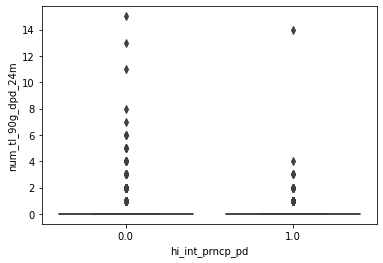

In [55]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "num_tl_90g_dpd_24m")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='out_prncp_inv'>

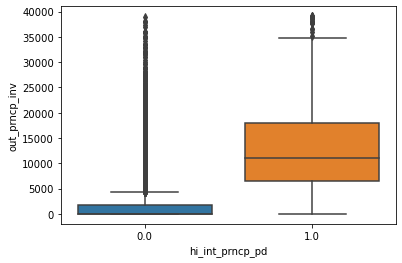

In [56]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "out_prncp_inv")

In [57]:
data['pub_rec'].value_counts()

0    8144
1    1206
2     172
3      33
4      20
5      11
8       3
7       3
9       2
6       2
Name: pub_rec, dtype: int64

In [58]:
cutoff = data['pub_rec'].value_counts() < 150


mask_obs = data['pub_rec'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 2)

data['pub_rec'] = data['pub_rec'].replace(mask_dict)

In [59]:
data['pub_rec'].value_counts()

0    8144
1    1206
2     246
Name: pub_rec, dtype: int64

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='pub_rec'>

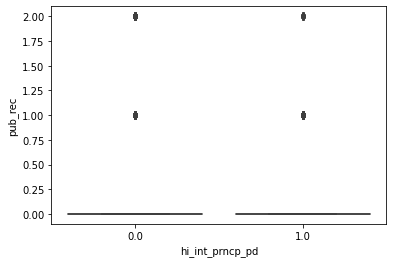

In [60]:
sns.boxplot(data = data, x = "hi_int_prncp_pd", y = "pub_rec")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='pub_rec'>

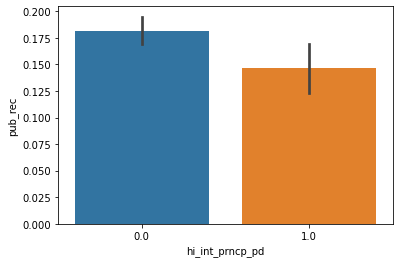

In [61]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "pub_rec")

In [62]:
data['pub_rec_bankruptcies'].value_counts()

0    8518
1    1016
2      50
3       9
5       2
7       1
Name: pub_rec_bankruptcies, dtype: int64

In [63]:
# effectively turning predictor into dummy variable by combining all non-zero categories
cutoff = data['pub_rec_bankruptcies'].value_counts() < 1000


mask_obs = data['pub_rec_bankruptcies'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 1)

data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].replace(mask_dict)

In [64]:
data['pub_rec_bankruptcies'].value_counts()

0    8518
1    1078
Name: pub_rec_bankruptcies, dtype: int64

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='pub_rec_bankruptcies'>

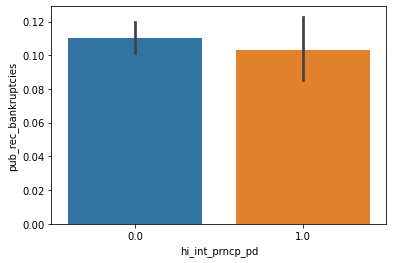

In [65]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "pub_rec_bankruptcies")

In [66]:
data['purpose'].value_counts()

debt_consolidation    5429
credit_card           2235
home_improvement       640
other                  527
major_purchase         242
small_business         141
medical                103
car                     88
vacation                70
house                   60
moving                  52
renewable_energy         8
wedding                  1
Name: purpose, dtype: int64

In [67]:
#creating "other" category for purposes with less than 80 occurrances
cutoff = data['purpose'].value_counts() < 80


mask_obs = data['purpose'].value_counts()[cutoff].index
mask_dict = dict.fromkeys(mask_obs, 'other')

data['purpose'] = data['purpose'].replace(mask_dict)

In [68]:
data['purpose'].value_counts()

debt_consolidation    5429
credit_card           2235
other                  718
home_improvement       640
major_purchase         242
small_business         141
medical                103
car                     88
Name: purpose, dtype: int64

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='purpose'>

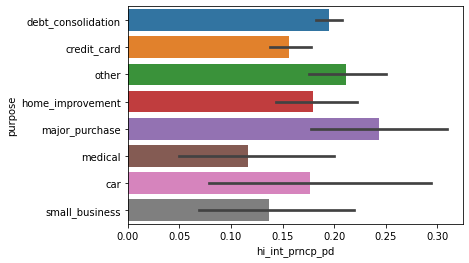

In [69]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "purpose")

In [70]:
data['sub_grade'].value_counts()

C1    632
B5    600
B1    578
B2    577
B3    559
C3    551
B4    547
A5    538
C4    513
C2    509
C5    503
A4    486
A1    428
A3    390
A2    356
D1    289
D2    270
D3    225
D4    212
D5    168
E1    121
E2     96
E4     88
E3     81
E5     77
F1     57
F2     35
F3     29
F4     18
F5     17
G1     15
G3     11
G5      9
G2      7
G4      4
Name: sub_grade, dtype: int64

In [71]:
data['term'].value_counts()

36 months    6957
60 months    2639
Name: term, dtype: int64

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='term'>

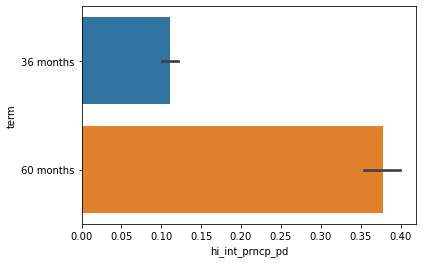

In [72]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "term")

<AxesSubplot:xlabel='tot_coll_amt', ylabel='hi_int_prncp_pd'>

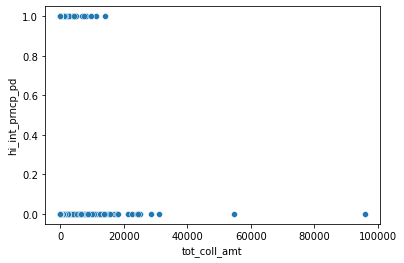

In [73]:
sns.scatterplot(data = data, x = "tot_coll_amt", y = "hi_int_prncp_pd")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='tot_coll_amt'>

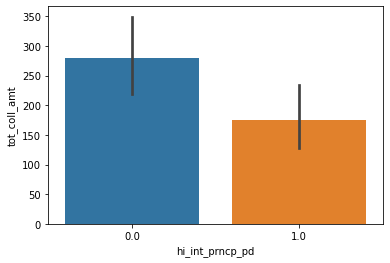

In [74]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "tot_coll_amt")

<AxesSubplot:xlabel='tot_cur_bal', ylabel='hi_int_prncp_pd'>

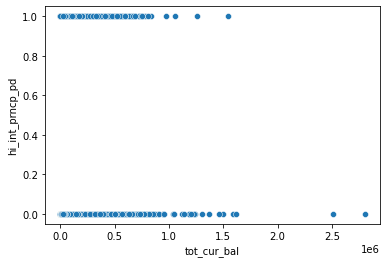

In [75]:
sns.scatterplot(data = data, x = "tot_cur_bal", y = "hi_int_prncp_pd")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='tot_cur_bal'>

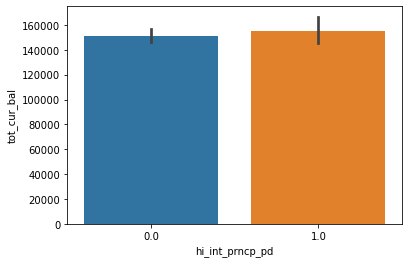

In [76]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "tot_cur_bal")

<AxesSubplot:xlabel='total_rec_late_fee', ylabel='hi_int_prncp_pd'>

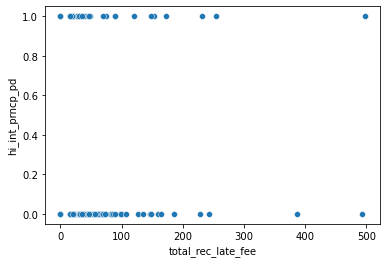

In [77]:
sns.scatterplot(data = data, x = "total_rec_late_fee", y = "hi_int_prncp_pd")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='total_rec_late_fee'>

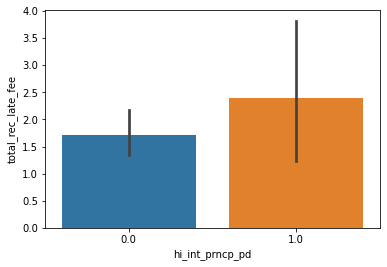

In [78]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "total_rec_late_fee")

<AxesSubplot:xlabel='hi_int_prncp_pd', ylabel='verification_status'>

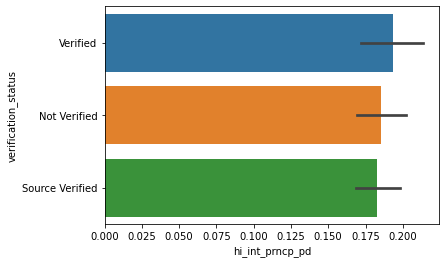

In [79]:
sns.barplot(data = data, x = "hi_int_prncp_pd", y = "verification_status")

# Variable Selection

In [80]:
#drop pass 1 - low variance and/or uncorrelated with response
data = data.drop(columns = ['acc_now_delinq', 'acc_open_past_24mths', 'application_type', 'avg_cur_bal', 'bc_util', 'delinq_2yrs', 'delinq_amnt', 'earliest_cr_line', 'mort_acc', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'sub_grade', 'tot_cur_bal'])

In [81]:
#drop pass 2 - unimportant predictors from initial models
data = data.drop(columns = ['last_credit_pull_d', 'home_ownership', 'pub_rec_bankruptcies', 'pub_rec', 'addr_state', 'verification_status', 'total_rec_late_fee', 'purpose'])

In [82]:
#drop pass 3 - only including a few very important predictors
data = data.drop(columns = ['tot_coll_amt', 'grade', 'emp_length', 'emp_title', 'annual_inc'])

# Final Model Tuning

In [83]:
data = pd.get_dummies(data)

In [84]:
#re-splitting train/test data
train = data.iloc[0:5778, :]

In [85]:
test = data.iloc[5778:, :]

In [86]:
train['hi_int_prncp_pd'] = train['hi_int_prncp_pd'].astype(int)

<ipython-input-86-fe1fb7e28580>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['hi_int_prncp_pd'] = train['hi_int_prncp_pd'].astype(int)


In [87]:
X = train.drop(columns = ['id', 'hi_int_prncp_pd'])
y = train['hi_int_prncp_pd']

In [88]:
Xtest = test.drop(columns = ['id', 'hi_int_prncp_pd'])

## XGboost

In [617]:
start_time = time.time()
param_grid = {'n_estimators':[500],
                'max_depth': [7,8],
              'learning_rate': [0.01,0.1],
               'gamma': [0.1,0.25,0.5],
               'reg_lambda':[0,0.01,0.001],
                'scale_pos_weight':[1.25,1.5]
             }

cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective = 'binary:logistic',random_state=1,
                                                         use_label_encoder=False),
                             param_grid = param_grid,
                             scoring = 'accuracy',
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv)
optimal_params.fit(X,y)
print(optimal_params.best_params_,optimal_params.best_score_)
print("Time taken = ", (time.time()-start_time)/60, " minutes")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'gamma': 0.25, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'reg_lambda': 0.001, 'scale_pos_weight': 1.25} 0.9165805359576986
Time taken =  1.7330790440241495  minutes


In [89]:
model1 = xgb.XGBClassifier(objective = 'binary:logistic',random_state=1,gamma=0.25,learning_rate = 0.01,max_depth=7,
                              n_estimators = 500,reg_lambda = 0.001,scale_pos_weight=1.25,use_label_encoder=False)
model1.fit(X,y,eval_metric='error')

C:\Users\alexk\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=0.001, ...)

In [90]:
#finding feature importances of boosted model
imp_dict = model1.get_booster().get_score(importance_type="gain")
pd.DataFrame.from_dict(imp_dict, orient='index').sort_values(by=0, ascending = False).iloc[0:10, :]

,0
term_36 months,30.040354
out_prncp_inv,22.073624
int_rate,10.399719
initial_list_status_f,2.949966
loan_amnt,2.918621
dti,2.443602


## Random Forest

In [621]:
start_time = time.time()

params = {'n_estimators': [500, 1000],
          'max_features': [1, 2, 3]
         }

param_list=list(it.product(*(params[Name] for Name in list(params.keys()))))
accuracy = [0]*len(param_list)

i=0
for pr in param_list:
    model = RandomForestClassifier(random_state=1,oob_score=True,verbose=False,n_estimators = pr[0],max_features=pr[1], n_jobs=-1).fit(X,y)
    oob_pred = model.oob_decision_function_[:,1]
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(y, oob_pred, bins=bins)[0]
    accuracy = 100*(cm[0,0]+cm[1,1])/cm.sum()
    i=i+1
    
print("max accuracy = ", np.max(accuracy))
print("params= ", param_list[np.argmax(accuracy)])

print("Time taken = ", (time.time()-start_time)/60, " minutes")

max accuracy =  91.6926272066459
params=  (500, 1)
Time taken =  0.1802238424619039  minutes


In [91]:
model2 = RandomForestClassifier(random_state=1,
                               n_jobs=-1,
                               max_features=1,
                               n_estimators=500).fit(X, y)

In [92]:
#finding feature importances of random forest model
feature_importances = np.mean([
    tree.feature_importances_ for tree in model2.estimators_
], axis=0)

importances = pd.concat([pd.Series(X.columns), pd.Series(feature_importances)], axis = 1)

importances.sort_values(by=1, ascending = False).iloc[0:10, :]

,0,1
3,out_prncp_inv,0.480870
1,int_rate,0.189386
0,dti,0.135970
2,loan_amnt,0.095514
6,term_36 months,0.042167
7,term_60 months,0.040583
5,initial_list_status_w,0.007853
4,initial_list_status_f,0.007658


## Voting Ensemble

In [93]:
ensemble_model = VotingClassifier(estimators=[('xgb', model1),('rf',model2)], voting = 'soft')
ensemble_model.fit(X,y)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0.25,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.01, max_bin=256,
                                            max_cat_to_onehot=4,
                                            max_delta_step=0, max_depth=7,
                         

In [94]:
pred = ensemble_model.predict(Xtest)

# Submission file

In [95]:
classification_submission = pd.DataFrame(pred)

In [96]:
classification_submission['id'] = test.id

In [97]:
classification_submission = classification_submission[['id', 0]]

In [98]:
classification_submission = classification_submission.rename(columns = {0:'Category'})

In [99]:
classification_submission.to_csv('classification_submission.csv', index = False)